<a href="https://colab.research.google.com/github/DotBion/NYU-DS-Bootcamp/blob/main/ass_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

import pandas as pd
import matplotlib.pyplot as plt

## Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
----- Write your code below this after running above above code-----------

|

#####2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.
-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

|
##### 3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.
Students can also show plots analyzing activity.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [5]:
df.describe()

,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long
count,16057.000000,16057.000000,16057.000000,16041.000000,16041.000000,1.605700e+04,1.605700e+04
mean,687.106309,334.772436,352.286853,53.213952,0.004617,4.070816e+01,-7.399951e+01
std,862.244605,417.807545,456.624509,18.036800,0.023400,5.762681e-12,1.124114e-11
min,0.000000,0.000000,0.000000,2.000000,0.000000,4.070816e+01,-7.399951e+01
25%,16.000000,9.000000,5.000000,39.000000,0.000000,4.070816e+01,-7.399951e+01
50%,227.000000,112.000000,111.000000,53.000000,0.000000,4.070816e+01,-7.399951e+01
75%,1254.000000,611.000000,632.000000,69.000000,0.000000,4.070816e+01,-7.399951e+01
max,4330.000000,3657.000000,2872.000000,97.000000,0.680400,4.070816e+01,-7.399951e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


In [7]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [8]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()

<ipython-input-8-b642f4e9e1ed>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


In [9]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday


In [12]:
df.loc[(df['day_name'] == 'Saturday') | (df['day_name'] == 'Sunday'), 'is_weekend'] = 1
df.loc[(df['day_name'] != 'Saturday') & (df['day_name'] != 'Sunday'), 'is_weekend'] = 0
df.head()


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name,is_weekend
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday,0.0
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday,0.0
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday,0.0
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday,0.0
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday,0.0


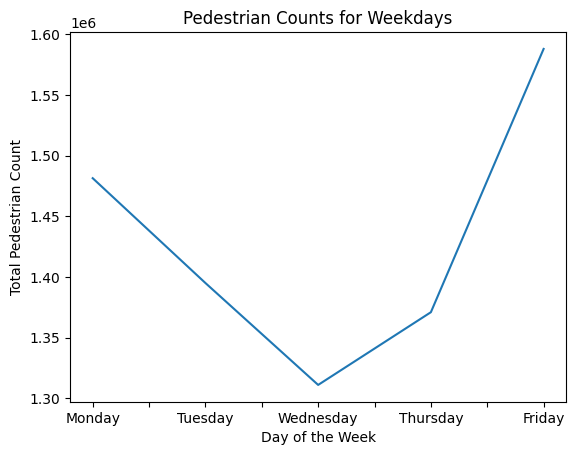

In [23]:
weekday_df = df[df['is_weekend'] == 0]
pedestrian_counts = weekday_df.groupby('day_name')['Pedestrians'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
pedestrian_counts = pedestrian_counts.reindex(weekday_order)
pedestrian_counts.plot(kind='line')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.title('Pedestrian Counts for Weekdays')
plt.show()

In [24]:
year_df = df[df['hour_beginning'].dt.year == 2019]
year_df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name,is_weekend
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday,0.0
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday,0.0
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday,0.0
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday,0.0
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday,0.0


In [26]:
year_df['weather_summary'].value_counts()

,count
weather_summary,
clear-night,1860
cloudy,1813
partly-cloudy-day,1773
clear-day,1413
partly-cloudy-night,1209
rain,607
snow,38
fog,22
sleet,8


In [32]:
# One-hot encode 'weather_summary'
weather_dummies = pd.get_dummies(year_df['weather_summary'], prefix='weather')
year_df = pd.concat([year_df, weather_dummies], axis=1)

correlation_matrix = year_df[['Pedestrians'] + list(weather_dummies.columns)].corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Pedestrians,weather_clear-day,weather_clear-day,weather_clear-day,weather_clear-night,weather_clear-night,weather_clear-night,weather_cloudy,weather_cloudy,weather_cloudy,...,weather_rain,weather_sleet,weather_sleet,weather_sleet,weather_snow,weather_snow,weather_snow,weather_wind,weather_wind,weather_wind
Pedestrians,1.000000,0.339758,0.339758,0.339758,-0.377297,-0.377297,-0.377297,-0.081255,-0.081255,-0.081255,...,-0.138581,-0.017091,-0.017091,-0.017091,-0.034052,-0.034052,-0.034052,-0.000170,-0.000170,-0.000170
weather_clear-day,0.339758,1.000000,1.000000,1.000000,-0.227660,-0.227660,-0.227660,-0.224004,-0.224004,-0.224004,...,-0.119645,-0.013257,-0.013257,-0.013257,-0.028943,-0.028943,-0.028943,-0.009372,-0.009372,-0.009372
weather_clear-day,0.339758,1.000000,1.000000,1.000000,-0.227660,-0.227660,-0.227660,-0.224004,-0.224004,-0.224004,...,-0.119645,-0.013257,-0.013257,-0.013257,-0.028943,-0.028943,-0.028943,-0.009372,-0.009372,-0.009372
weather_clear-day,0.339758,1.000000,1.000000,1.000000,-0.227660,-0.227660,-0.227660,-0.224004,-0.224004,-0.224004,...,-0.119645,-0.013257,-0.013257,-0.013257,-0.028943,-0.028943,-0.028943,-0.009372,-0.009372,-0.009372
weather_clear-night,-0.377297,-0.227660,-0.227660,-0.227660,1.000000,1.000000,1.000000,-0.265198,-0.265198,-0.265198,...,-0.141648,-0.015695,-0.015695,-0.015695,-0.034266,-0.034266,-0.034266,-0.011096,-0.011096,-0.011096
weather_clear-night,-0.377297,-0.227660,-0.227660,-0.227660,1.000000,1.000000,1.000000,-0.265198,-0.265198,-0.265198,...,-0.141648,-0.015695,-0.015695,-0.015695,-0.034266,-0.034266,-0.034266,-0.011096,-0.011096,-0.011096
weather_clear-night,-0.377297,-0.227660,-0.227660,-0.227660,1.000000,1.000000,1.000000,-0.265198,-0.265198,-0.265198,...,-0.141648,-0.015695,-0.015695,-0.015695,-0.034266,-0.034266,-0.034266,-0.011096,-0.011096,-0.011096
weather_cloudy,-0.081255,-0.224004,-0.224004,-0.224004,-0.265198,-0.265198,-0.265198,1.000000,1.000000,1.000000,...,-0.139373,-0.015443,-0.015443,-0.015443,-0.033715,-0.033715,-0.033715,-0.010917,-0.010917,-0.010917
weather_cloudy,-0.081255,-0.224004,-0.224004,-0.224004,-0.265198,-0.265198,-0.265198,1.000000,1.000000,1.000000,...,-0.139373,-0.015443,-0.015443,-0.015443,-0.033715,-0.033715,-0.033715,-0.010917,-0.010917,-0.010917
weather_cloudy,-0.081255,-0.224004,-0.224004,-0.224004,-0.265198,-0.265198,-0.265198,1.000000,1.000000,1.000000,...,-0.139373,-0.015443,-0.015443,-0.015443,-0.033715,-0.033715,-0.033715,-0.010917,-0.010917,-0.010917


In [31]:
correlation_matrix = year_df.corr()
correlation_matrix

ValueError: could not convert string to float: 'Brooklyn Bridge'

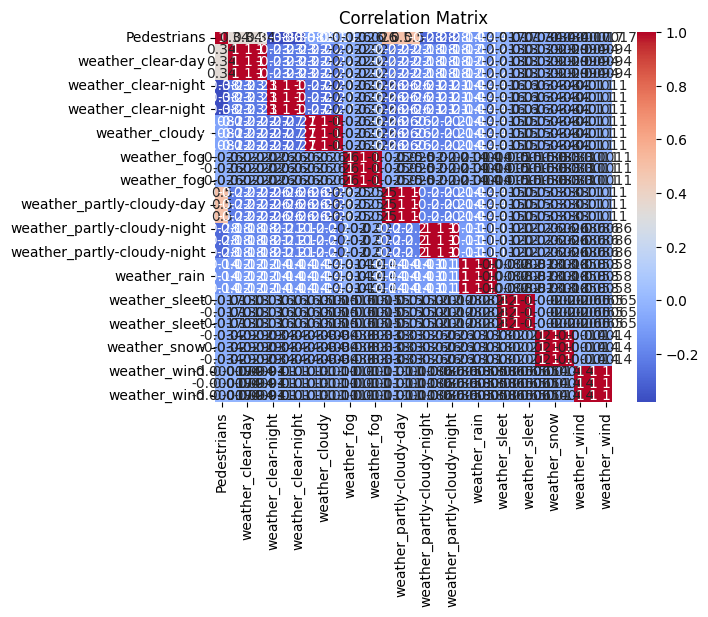

In [34]:
import seaborn as sns
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#how to visualize this properly ??

Time_of_Day
Afternoon    5852025
Evening      2432145
Morning      2480582
Night         268114
Name: Pedestrians, dtype: int64


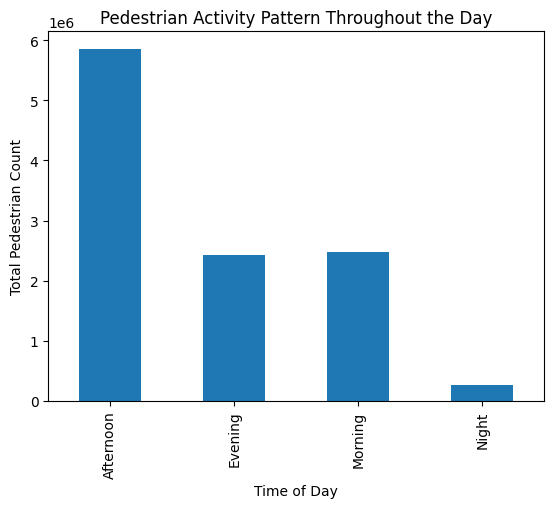

In [35]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['hour'].apply(categorize_time_of_day)

# Analyze pedestrian activity patterns by time of day
pedestrian_activity_by_time = df.groupby('Time_of_Day')['Pedestrians'].sum()
print(pedestrian_activity_by_time)

# Plotting for visualization (optional)
pedestrian_activity_by_time.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.title('Pedestrian Activity Pattern Throughout the Day')
plt.show()